In [1]:
from linear_depth_circuit import *
from matrix_simulation import *
from naive_circuit import *
from shift_circuit import *
import matplotlib.pyplot as plt
import numpy as np

In [30]:
# Number of position qubits
n = 3
# Number of steps
n_step = 200
# Number of times we want to run the circuits
n_shot = 100000
# Angles for the coin operators
#angles = random_angles(n)

angles = np.array([[ 2.04965065, -1.40857922, -0.92367785,  2.79345642],
       [ 0.78803616,  2.65787445, -2.41605216,  1.06079763],
       [ 2.33616145,  1.80543107,  1.62653295,  1.37954004],
       [ 0.83464054, -0.6205838 , -2.18954578,  2.19632113],
       [ 0.14646079, -1.58351372,  0.15425736,  1.68034403],
       [ 2.83703533,  1.81087703, -2.22138109,  1.87405243],
       [ 2.5120075 ,  0.46211176,  1.15354949,  1.10728697],
       [ 0.5405225 ,  2.67464114, -1.52776719,  1.97339916]])

# Naive position-dependent coin operators quantum circuit
naive_qc = quantum_walk_naive_circuit(n,angles,n_step,qft=True)
counts1 = simulate_circuit(naive_qc,n_shot)

# Linear-depth position-dependent coin operators quantum circuit
linear_qc = quantum_walk_linear_depth_circuit(n,angles,n_step,qft=True)
counts2 = simulate_circuit(linear_qc,n_shot)

# Matrix simulation
v = position_state(n)
c = coin_state()
q = quantum_state(v,c)

q_final = quantum_walk_simulation(n,q,angles,n_step)

counts3 = results(n,q_final)
# Convert the matrix simulation results in qiskit dictionary
counts3 = Counts(counts3)

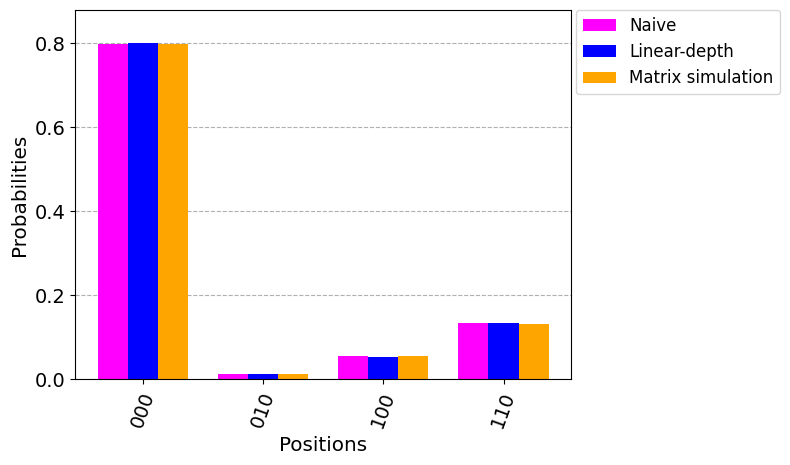

In [63]:
# display the plot
fig, ax = plt.subplots()

plot_histogram([counts1,counts2, counts3], legend=['Naive','Linear-depth', 'Matrix simulation'],color=['magenta','blue','orange'],bar_labels=False, ax=ax)
ax.set_xlabel('Positions', fontsize='x-large')
ax.set_ylabel('Probabilities',fontsize='x-large')

plt.show()

In [32]:
counts1

{'100': 5607, '110': 13329, '010': 1278, '000': 79786}

In [33]:
counts2

{'100': 5435, '010': 1236, '000': 79892, '110': 13437}

In [34]:
counts3

{'000': 0.7988020917019593,
 '010': 0.012488240368424504,
 '100': 0.05593545386277343,
 '110': 0.1327742140668542}

### Plots

In [8]:
n_max = 8
n_abs = [i for i in range(1,n_max+1)]

# Depth
depth_naive_compiled = []
depth_linear_compiled = []

# Quantum gates
gate_naive_compiled = []
gate_linear_compiled = []

# Collecting the datas
basis = ['cx', 'rx', 'ry', 'rz', 'p']
simulator = QasmSimulator()

for i in range(1,n_max+1):
    print(i)
    angle = np.load('angles/angles_'+str(i)+'.npy')
    # Building the circuits
    qc_naive = build_naive_circuit(i,angle)
    qc_linear = build_linear_depth_circuit(i,angle)
    # Getting the compiled circuits
    qc_naive_compiled = transpile(qc_naive, simulator, basis_gates=basis, optimization_level=2)
    qc_linear_compiled = transpile(qc_linear, simulator, basis_gates=basis, optimization_level=2)
    # Depth
    depth_naive_compiled.append(qc_naive_compiled.depth())
    depth_linear_compiled.append(qc_linear_compiled.depth())
    # Number of gate
    gate_naive_compiled.append(sum(dict(qc_naive_compiled.count_ops()).values()))
    gate_linear_compiled.append(sum(dict(qc_linear_compiled.count_ops()).values()))

In [13]:
# Stored results
depth_naive = [32, 126, 491, 1972, 7973, 32198, 129667, 913409]
depth_linear = [59, 117, 178, 235, 292, 349, 407, 465]
gate_naive = [39, 157, 607, 2313, 8875, 34445, 135051, 1108992]
gate_linear = [87, 252, 591, 1266, 2613, 5304, 10683, 21438]
depth_walsh = [11.,   44.,  100.,  212.,  436.,  884., 1780., 3572.]
gate_walsh = [16.,   47.,  103.,  215.,  439.,  887., 1783., 3575.]

In [21]:
def plot(x,y1,y2,y3,label):
    plt.plot(x,y1,label='Naive circuit',color='orange',marker='o',markeredgecolor='red',markerfacecolor='red')
    plt.plot(x,y2,label='Linear-depth circuit',color='blue',marker='o',markeredgecolor='green',markerfacecolor='green')
    plt.plot(x,y3,label='Walsh circuit',color='magenta',marker='o',markeredgecolor='purple',markerfacecolor='purple')
    plt.xlabel('n', fontsize=15)
    plt.ylabel(label, fontsize=13)
    plt.legend(prop={'size':12})
    plt.savefig(label+".png")
    plt.show()

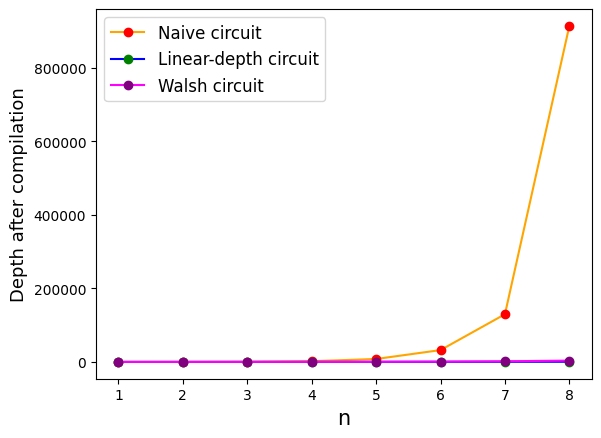

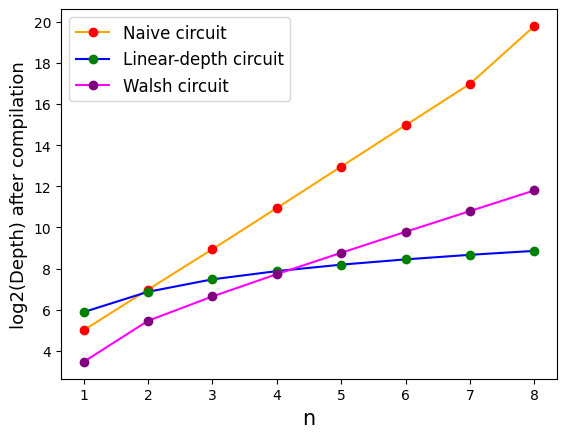

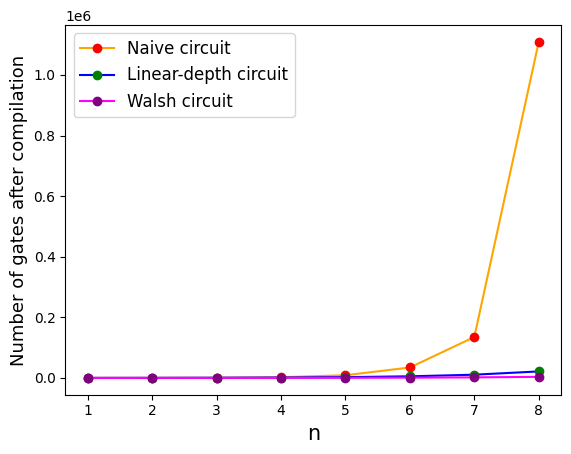

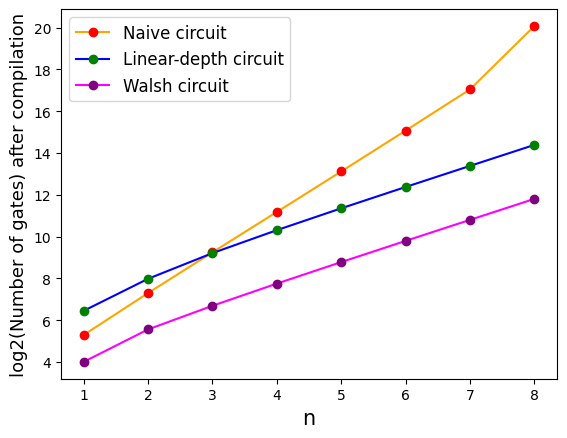

In [22]:
plot(n_abs, depth_naive, depth_linear, depth_walsh, 'Depth after compilation')
plot(n_abs, np.log2(depth_naive), np.log2(depth_linear), np.log2(depth_walsh), 'log2(Depth) after compilation')
plot(n_abs, gate_naive, gate_linear, gate_walsh, 'Number of gates after compilation')
plot(n_abs, np.log2(gate_naive), np.log2(gate_linear), np.log2(gate_walsh), 'log2(Number of gates) after compilation')

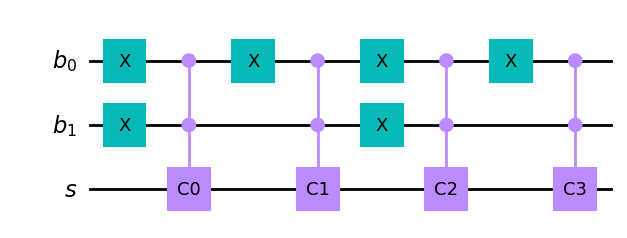

In [7]:
naive_qc = build_naive_circuit(2,random_angles(2))
naive_qc.draw("mpl")

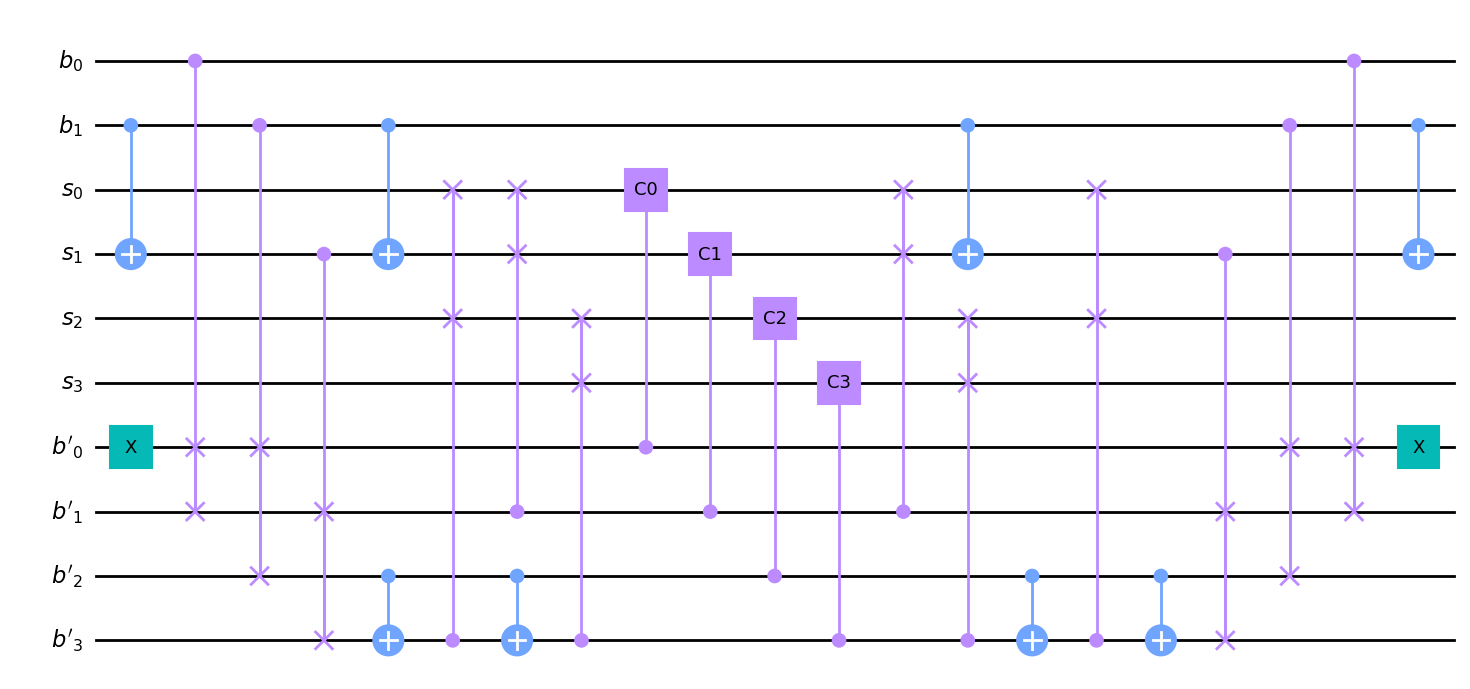

In [8]:
linear_qc = build_linear_depth_circuit(2,random_angles(2))
linear_qc.draw("mpl")

In [2]:
n = 3
qft = qft_shift(n)
fuji = shift(n)

simulator = QasmSimulator()
basis = ['rx', 'ry', 'rz', 'p','cx']

qft_compiled = transpile(qft, simulator, basis_gates=basis, optimization_level=3)
print(qft_compiled.depth(), sum(dict(qft_compiled.count_ops()).values()))
print(qft.depth())

23 30
11


In [3]:
fuji_compiled = transpile(fuji, simulator, basis_gates=basis, optimization_level=2)
print(fuji_compiled.depth(), sum(dict(fuji_compiled.count_ops()).values()))

74 90


In [4]:
print(sum(dict(qft.count_ops()).values()), sum(dict(qft_compiled.count_ops()).values()))

13 30


In [5]:
linear = build_linear_depth_circuit(n, random_angles(n))

linear_compiled = transpile(linear, simulator, basis_gates=basis, optimization_level=2)

print(sum(dict(linear.count_ops()).values()), sum(dict(linear_compiled.count_ops()).values()))

70 591


In [6]:
depth_linear

[7, 15, 23, 31, 39, 47, 55, 63]

In [7]:
depth_linear_compiled

[55, 112, 171, 226, 281, 336, 392, 448]

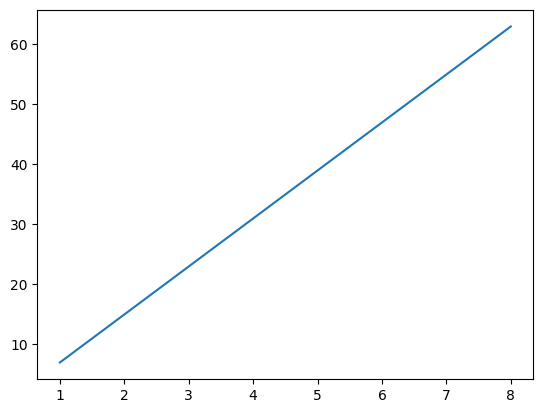

In [12]:
plt.plot([1,2,3,4,5,6,7,8], depth_linear)

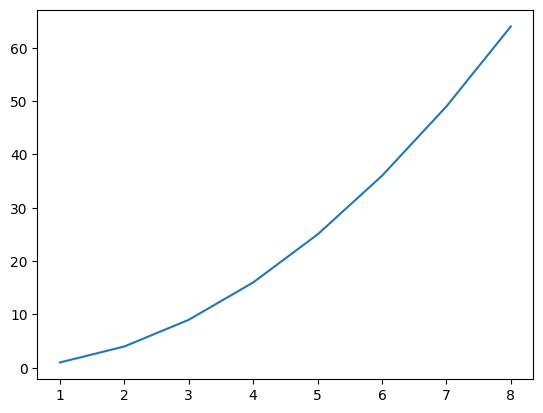

In [16]:
plt.plot([1,2,3,4,5,6,7,8], [i**2 for i in [1,2,3,4,5,6,7,8]])